<a href="https://colab.research.google.com/github/claredavies/MedicalImaging/blob/main/MedicalImagingProject.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Install neeeded packages (After running **RESTART RUNTIME**)

In [1]:
!pip install pydicom
!pip install pylibjpeg
!pip install gdcm
!pip install pydicom[pylibjpeg]
!pip install python-gdcm
!pip install -U pylibjpeg pylibjpeg-openjpeg pylibjpeg-libjpeg
!pip install pydicom pylibjpeg pylibjpeg-libjpeg
!pip install utils

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 17.9 MB/s eta 0:00:00
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.7/2.7 MB 7.2 MB/s eta 0:00:00
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.0/13.0 MB 78.8 MB/s eta 0:00:00
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.4/1.4 MB 16.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.3/4.3 MB 16.7 MB/s eta 0:00:00
Looking in

# Loading need libraries

In [1]:
import os

import matplotlib
import pydicom
import numpy as np
import scipy
from matplotlib import pyplot as plt, animation
import zipfile
import cv2
from scipy.optimize import minimize

# Sorting via headers

In [2]:
import zipfile

def unzip_file(zip_path, target_folder):
    with zipfile.ZipFile(zip_path, 'r') as zip_ref:
        zip_ref.extractall(target_folder)

In [3]:
unzip_file('HCC_004.zip','file')

In [4]:
def load_dcm_files_from_folder(folder_path):
  image_files = []
  for root, dirs, files in os.walk(folder_path):
      for file in files:
          if file.endswith('.dcm'):
              dicom_file = pydicom.dcmread(os.path.join(root, file))
              image_files.append(dicom_file)

  return image_files

only using one ct file as 1 matching patient psoition

In [5]:
relevent_ct_dcm_files = load_dcm_files_from_folder("file/HCC_004/10-06-1997-NA-LIVERPELVIS-14785/5.000000-Recon 3 LIVER 3 PHASE AP-40661")
segmentation_dcm_file = pydicom.dcmread("file/HCC_004/10-06-1997-NA-LIVERPELVIS-14785/300.000000-Segmentation-39561/1-1.dcm")

In [6]:
def getPatientPositionListSegmentation(dcm_file):
  per_frame_groups_sequence = dcm_file.PerFrameFunctionalGroupsSequence
  # Iterate over each frame
  patient_position_list = []
  for idx, item in enumerate(per_frame_groups_sequence):
      plane_position_sequence = item.PlanePositionSequence
      str_plane_position_sequence = str(plane_position_sequence)
      patient_position = str_plane_position_sequence.split(":")[-1].strip().lstrip("[").rstrip("]").split(", ")
      patient_position_list.append(patient_position)
  patient_position_list = [[float(value) for value in sublist] for sublist in patient_position_list]


  return patient_position_list

In [7]:
def getSegmentationGroupList(dcm_file):
  per_frame_groups_sequence = dcm_file.PerFrameFunctionalGroupsSequence
  # Iterate over each frame
  segment_group_list = []
  for idx, item in enumerate(per_frame_groups_sequence):
      # print(item)
      segment_identification_sequence = item.SegmentIdentificationSequence
      str_segment_identification_sequence = str(segment_identification_sequence)
      segment_group = str_segment_identification_sequence.split(":")[-1].strip().rstrip("]")
      segment_group_list.append(segment_group)
  
  return segment_group_list


In [8]:
def getPatientPositionCT(dcm_file):
  image_position_patient = dcm_file.ImagePositionPatient
  return image_position_patient

In [9]:
def getPatientPositionsCT(dcm_files):
  patient_position_list = []
  for dcm_file in dcm_files:
    patient_position_list.append(getPatientPositionCT(dcm_file))
  patient_position_list = [[float(value) for value in sublist] for sublist in patient_position_list]
  return patient_position_list

In [10]:
segmentation_group_list = getSegmentationGroupList(segmentation_dcm_file)
segmentation_patient_position_group_list = getPatientPositionListSegmentation(segmentation_dcm_file)

print(segmentation_patient_position_group_list)

[[-178.0, -160.0, -205.0], [-178.0, -160.0, -202.5], [-178.0, -160.0, -200.0], [-178.0, -160.0, -197.5], [-178.0, -160.0, -195.0], [-178.0, -160.0, -192.5], [-178.0, -160.0, -190.0], [-178.0, -160.0, -187.5], [-178.0, -160.0, -185.0], [-178.0, -160.0, -182.5], [-178.0, -160.0, -180.0], [-178.0, -160.0, -177.5], [-178.0, -160.0, -175.0], [-178.0, -160.0, -172.5], [-178.0, -160.0, -170.0], [-178.0, -160.0, -167.5], [-178.0, -160.0, -165.0], [-178.0, -160.0, -162.5], [-178.0, -160.0, -160.0], [-178.0, -160.0, -157.5], [-178.0, -160.0, -155.0], [-178.0, -160.0, -152.5], [-178.0, -160.0, -150.0], [-178.0, -160.0, -147.5], [-178.0, -160.0, -145.0], [-178.0, -160.0, -142.5], [-178.0, -160.0, -140.0], [-178.0, -160.0, -137.5], [-178.0, -160.0, -135.0], [-178.0, -160.0, -132.5], [-178.0, -160.0, -130.0], [-178.0, -160.0, -127.5], [-178.0, -160.0, -125.0], [-178.0, -160.0, -122.5], [-178.0, -160.0, -120.0], [-178.0, -160.0, -117.5], [-178.0, -160.0, -115.0], [-178.0, -160.0, -112.5], [-178.0, -1

In [11]:
ct_patient_position_group_list = getPatientPositionsCT(relevent_ct_dcm_files)
print(ct_patient_position_group_list)

[[-178.0, -160.0, -17.5], [-178.0, -160.0, -42.5], [-178.0, -160.0, -102.5], [-178.0, -160.0, -130.0], [-178.0, -160.0, -65.0], [-178.0, -160.0, -140.0], [-178.0, -160.0, -120.0], [-178.0, -160.0, -185.0], [-178.0, -160.0, -112.5], [-178.0, -160.0, -35.0], [-178.0, -160.0, -182.5], [-178.0, -160.0, -200.0], [-178.0, -160.0, -135.0], [-178.0, -160.0, -87.5], [-178.0, -160.0, -137.5], [-178.0, -160.0, -30.0], [-178.0, -160.0, -97.5], [-178.0, -160.0, -160.0], [-178.0, -160.0, -157.5], [-178.0, -160.0, -172.5], [-178.0, -160.0, -180.0], [-178.0, -160.0, -27.5], [-178.0, -160.0, -105.0], [-178.0, -160.0, -72.5], [-178.0, -160.0, -62.5], [-178.0, -160.0, -67.5], [-178.0, -160.0, -15.0], [-178.0, -160.0, -147.5], [-178.0, -160.0, -145.0], [-178.0, -160.0, -177.5], [-178.0, -160.0, -22.5], [-178.0, -160.0, -37.5], [-178.0, -160.0, -142.5], [-178.0, -160.0, -192.5], [-178.0, -160.0, -175.0], [-178.0, -160.0, -170.0], [-178.0, -160.0, -150.0], [-178.0, -160.0, -117.5], [-178.0, -160.0, -57.5], 

In [12]:
def get_index_val(images):
  index_list = []
  for i, image in enumerate(images):
    index_list.append(i)
  return index_list

In [85]:
segmentation_images = segmentation_dcm_file.pixel_array
ct_images = []
for ct_file in relevent_ct_dcm_files:
    ct_images.append(ct_file.pixel_array)

segmentation_indexed = get_index_val(segmentation_images)
ct_indexed = get_index_val(ct_images)

In [14]:
print(segmentation_indexed)
print(ct_indexed)

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 200, 201, 202, 203, 204, 205, 206, 207, 208, 209, 210, 211, 212, 213, 214, 215, 216, 217, 218, 219, 220, 221,

In [15]:
def find_matching_ct_and_segmentation(ct_indexed, ct_patient_position_group_list, segmentation_indexed, segmentation_patient_position_group_list):
  matched_images = {}
  segmented_index_to_ct_index = []

  # Iterate over the CT images and patient positions
  for ct_image, ct_position in zip(ct_indexed, ct_patient_position_group_list):
      # Create a list to store the matched segmentation images
      matched_segmentations = []
      
      # Iterate over the segmentation images and patient positions
      for seg_image, seg_position in zip(segmentation_indexed, segmentation_patient_position_group_list):
          # Check if the patient positions match
          if ct_position == seg_position:
              # Add the segmentation image to the list of matched segmentations
              matched_segmentations.append(seg_image)
      
      # Store the CT image and matched segmentations in the dictionary
      matched_images[ct_image] = matched_segmentations
      segmented_index_to_ct_index.append(matched_segmentations)

  # Print the matched image pairs
  # for ct_image, seg_images in matched_images.items():
  #     print(f"CT Image: {ct_image}")
  #     print("Segmentation Images:")
  #     for seg_image in seg_images:
  #         print(seg_image)
  #     print()

  return segmented_index_to_ct_index

In [16]:
def get_group_from_segmentation_index(index):
  return segmentation_group_list[index]

In [17]:
matching_ct_and_segmentation = find_matching_ct_and_segmentation(ct_indexed, ct_patient_position_group_list, segmentation_indexed, segmentation_patient_position_group_list)

In [18]:
print(segmentation_images[40].shape)

(512, 512)


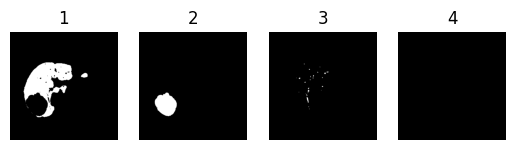

In [19]:
# 40, 119, 198, 277
plt.subplot(1, 4, 1)
plt.title('1')
plt.axis('off')
plt.imshow(segmentation_images[40], cmap='gray')

plt.subplot(1, 4, 2)
plt.title('2')
plt.axis('off')
plt.imshow(segmentation_images[119], cmap='gray')

plt.subplot(1, 4, 3)
plt.title('3')
plt.axis('off')
plt.imshow(segmentation_images[198], cmap='gray')

plt.subplot(1, 4, 4)
plt.title('4')
plt.axis('off')
plt.imshow(segmentation_images[277], cmap='gray')

plt.show()

In [20]:
def mark_segmentations(ct_images, segmentation_images, matching_ct_and_segmentation):
  marked_segmentation_ct = []
  for i, ct_image in enumerate(ct_images):
    marked_image = mark_segmentation(ct_images, i, segmentation_images, matching_ct_and_segmentation)
    marked_segmentation_ct.append(marked_image)
  return marked_segmentation_ct

In [89]:
def getMasks(ct_image_index):
  matching_segmentations = matching_ct_and_segmentation[ct_image_index]
  masks = [segmentation_images[j] for j in matching_segmentations]
  return masks

have sample ct image and it's segmentations and show before and after - with masks marked

In [73]:
import numpy as np

def process_images(image_list):
    processed_images = []

    for image in image_list:
        # Process each pixel of the image
        image[(image >= 252) & (image <= 255)] = 251  # Mark pixels with values 252, 253, 254, and 255 as 251

        # Append the processed image to the list
        processed_images.append(image)

    return processed_images

In [119]:
print("type:  ", ct_images[1].dtype)

type:   int16


[41, 120, 199, 278]


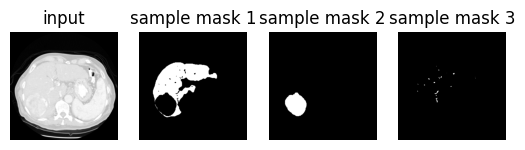

In [117]:
ct_images_processed = process_images(ct_images)

sample_index = 2
sample_masks = getMasks(sample_index)
im_sample = ct_images_processed[sample_index]

# 40, 119, 198, 277
plt.subplot(1, 4, 1)
plt.title('input')
plt.axis('off')
plt.imshow(im_sample, cmap='gray')

plt.subplot(1, 4, 2)
plt.title('sample mask 1')
plt.axis('off')
plt.imshow(sample_masks[0], cmap='gray')

plt.subplot(1, 4, 3)
plt.title('sample mask 2')
plt.axis('off')
plt.imshow(sample_masks[1], cmap='gray')

plt.subplot(1, 4, 4)
plt.title('sample mask 3')
plt.axis('off')
plt.imshow(sample_masks[2], cmap='gray')

plt.show()

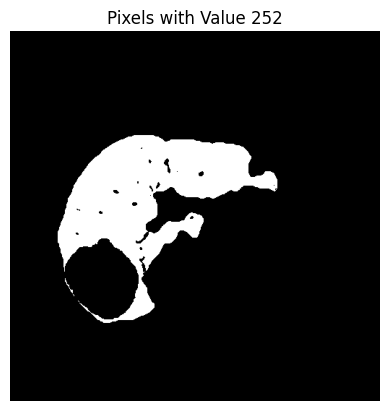

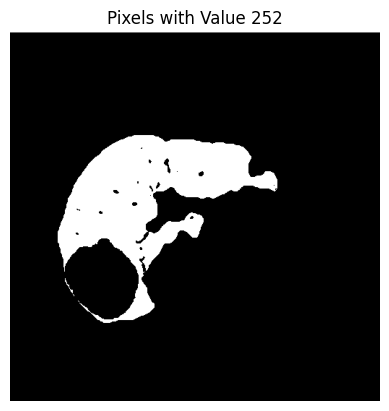

In [175]:
int16_image = ct_images[10]
_, binary_image = cv2.threshold(sample_masks[0], 0, 1, cv2.THRESH_BINARY)
plt.imshow(binary_image, cmap='gray')
plt.title('Pixels with Value 252')
plt.axis('off')
plt.show()
int16_image[binary_image == 1] = 252


# Assuming int16_image is your int16 image
pixels_252 = (int16_image == 252)

# Create a binary mask of pixels with value 252
mask_252 = np.zeros_like(int16_image, dtype=np.uint8)
mask_252[pixels_252] = 255

# Display the mask_252 image
plt.imshow(mask_252, cmap='gray')
plt.title('Pixels with Value 252')
plt.axis('off')
plt.show()

In [190]:
def overlay_binary_image(int16_image, segment_image):
    # Convert the binary image to int16
    _, binary_image = cv2.threshold(segment_image, 0, 1, cv2.THRESH_BINARY)

    plt.imshow(binary_image, cmap='gray')
    plt.title('Pixels with Value 252')
    plt.axis('off')
    plt.show()
    int16_image[binary_image == 1] = 252

    # Assuming int16_image is your int16 image
    pixels_252 = (int16_image == 252)

    # Create a binary mask of pixels with value 252
    mask_252 = np.zeros_like(int16_image, dtype=np.uint8)
    mask_252[pixels_252] = 255

    # Display the mask_252 image
    plt.imshow(mask_252, cmap='gray')
    plt.title('Pixels with Value 252')
    plt.axis('off')
    plt.show()

    plt.imshow(int16_image, cmap='gray')
    plt.title('overlay')
    plt.axis('off')
    plt.show()

    return int16_image

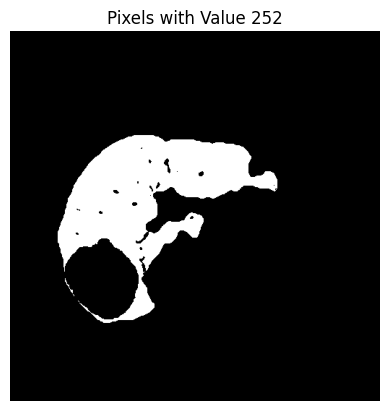

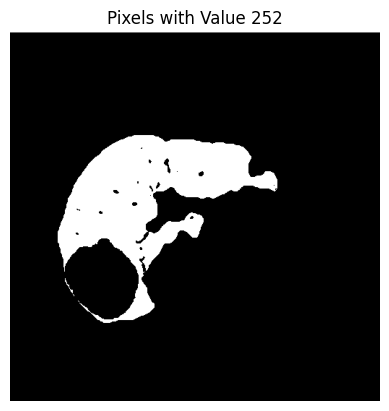

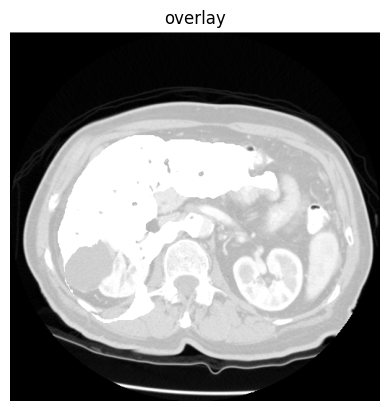

int16


In [191]:
overlay_image = overlay_binary_image(ct_images[10], sample_masks[0])
print(overlay_image.dtype)

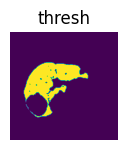

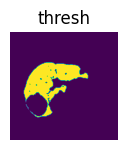

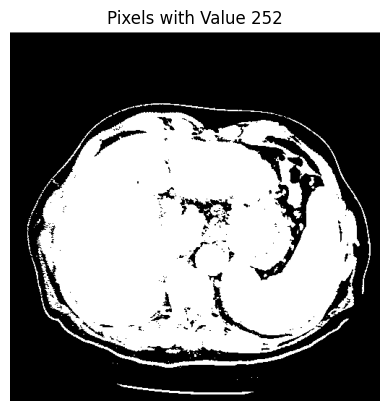

In [178]:
overlay_image = overlay_binary_image(im_sample, sample_masks[0])

# Assuming int16_image is your int16 image
pixels_252 = (overlay_image == 252)

# Create a binary mask of pixels with value 252
mask_252 = np.zeros_like(overlay_image, dtype=np.uint8)
mask_252[pixels_252] = 255

# Display the mask_252 image
plt.imshow(mask_252, cmap='gray')
plt.title('Pixels with Value 252')
plt.axis('off')
plt.show()

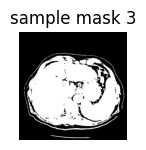

In [138]:
plt.subplot(1, 4, 4)
plt.title('sample mask 3')
plt.axis('off')
plt.imshow(sample_masks[1], cmap='gray')

plt.show()

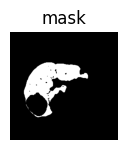

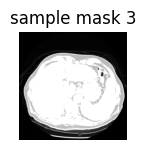

In [139]:
overlay_image = overlay_binary_image(im_sample, sample_masks[0])

plt.subplot(1, 4, 4)
plt.title('sample mask 3')
plt.axis('off')
plt.imshow(overlay_image, cmap='gray')

plt.show()

In [ ]:
def mark_segmentation(ct_images, ct_image_index, segmentation_images, matching_ct_and_segmentation):
    ct_image = ct_images[ct_image_index]
    if ct_image.dtype == np.int16:
        # Convert the image to a supported depth (e.g., CV_8U)
        ct_image = cv2.convertScaleAbs(ct_image)

    marked_image = cv2.cvtColor(ct_image, cv2.COLOR_GRAY2BGR)
    key_image = np.zeros_like(marked_image)

    matching_segmentations = matching_ct_and_segmentation[ct_image_index]
    # print(matching_segmentations)
    for j in matching_segmentations:
        # print(j)
        segment_image = segmentation_images[j]
        segment_image = cv2.resize(segment_image, (marked_image.shape[1], marked_image.shape[0]))

        part = get_group_from_segmentation_index(j)
        # print("part: ", part)
        part = int(part)
        if part == 1:
            label = 'Liver'
            colour = [255, 0, 0]
            # red
        elif part == 2:
            label = 'Mass'
            colour = [0, 255, 0]
            # green
        elif part == 3:
            label = 'Portal Vein'
            colour = [255, 255, 0]
            # yellow
        else:
            label = 'Abdominal aorta'
            colour = [0, 0, 255]
            # blue

        _, binary_image = cv2.threshold(segment_image, 0, 1, cv2.THRESH_BINARY)
        nonzero_pixels = np.nonzero(binary_image)
        # print(nonzero_pixels)

        marked_image[nonzero_pixels] = colour
    #     key_image = cv2.rectangle(key_image, (0, part * 50), (50, (part+1) * 50), colour, -1)
    #     key_image = cv2.putText(key_image, label, (60, part * 50 + 30), cv2.FONT_HERSHEY_SIMPLEX, 1, (255, 255, 255), 2, cv2.LINE_AA)

    # output_image = np.hstack((marked_image, key_image))

    return marked_image

In [22]:
def mark_segmentation(ct_images, ct_image_index, segmentation_images, matching_ct_and_segmentation):
    ct_image = ct_images[ct_image_index]
    if ct_image.dtype == np.int16:
        # Convert the image to a supported depth (e.g., CV_8U)
        ct_image = cv2.convertScaleAbs(ct_image)

    marked_image = cv2.cvtColor(ct_image, cv2.COLOR_GRAY2BGR)
    key_image = np.zeros_like(marked_image)

    matching_segmentations = matching_ct_and_segmentation[ct_image_index]
    # print(matching_segmentations)
    for j in matching_segmentations:
        # print(j)
        segment_image = segmentation_images[j]
        segment_image = cv2.resize(segment_image, (marked_image.shape[1], marked_image.shape[0]))

        part = get_group_from_segmentation_index(j)
        # print("part: ", part)
        part = int(part)
        if part == 1:
            label = 'Liver'
            colour = [255, 0, 0]
            # red
        elif part == 2:
            label = 'Mass'
            colour = [0, 255, 0]
            # green
        elif part == 3:
            label = 'Portal Vein'
            colour = [255, 255, 0]
            # yellow
        else:
            label = 'Abdominal aorta'
            colour = [0, 0, 255]
            # blue

        _, binary_image = cv2.threshold(segment_image, 0, 1, cv2.THRESH_BINARY)
        nonzero_pixels = np.nonzero(binary_image)
        # print(nonzero_pixels)

        marked_image[nonzero_pixels] = colour
    #     key_image = cv2.rectangle(key_image, (0, part * 50), (50, (part+1) * 50), colour, -1)
    #     key_image = cv2.putText(key_image, label, (60, part * 50 + 30), cv2.FONT_HERSHEY_SIMPLEX, 1, (255, 255, 255), 2, cv2.LINE_AA)

    # output_image = np.hstack((marked_image, key_image))

    return marked_image

In [23]:
marked_seg = mark_segmentation(ct_images, 3, segmentation_images, matching_ct_and_segmentation)

In [24]:
def median_sagittal_plane(img_dcm: np.ndarray) -> np.ndarray:
    """ Compute the median sagittal plane of the CT image provided. """
    return img_dcm[:, img_dcm.shape[1]//2, :]

(512, 512, 3)


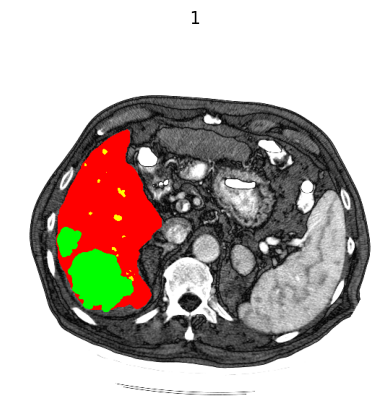

In [25]:

plt.title('1')
plt.axis('off')
plt.imshow(marked_seg, cmap='brg')
print(marked_seg.shape)

# rr

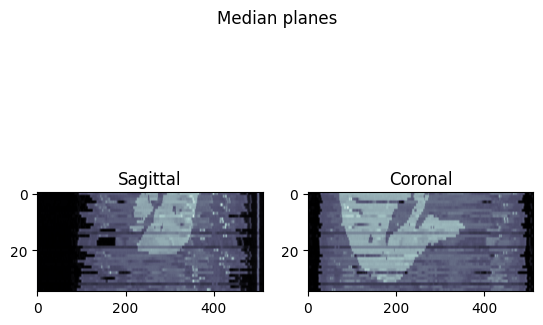

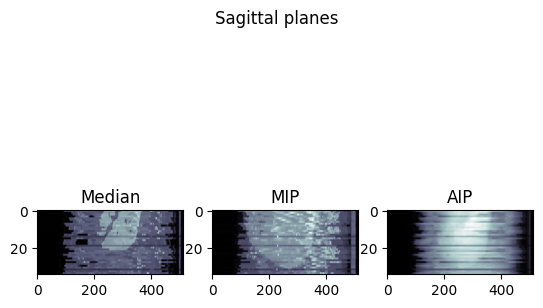

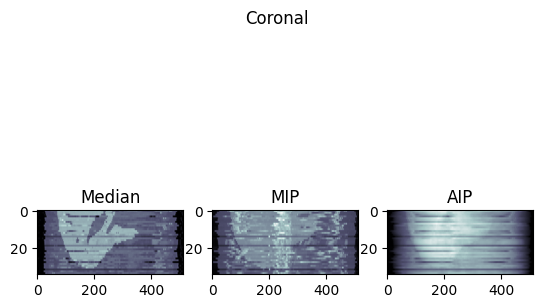

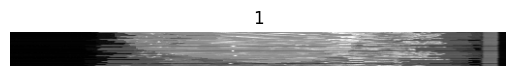

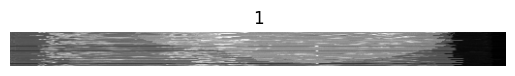

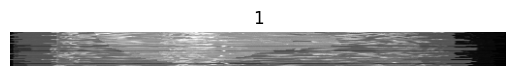

<Figure size 640x480 with 0 Axes>

In [61]:
import os

import matplotlib
import pydicom
import numpy as np
import scipy
from matplotlib import pyplot as plt, animation


def median_sagittal_plane(img_dcm: np.ndarray) -> np.ndarray:
    """Compute the median sagittal plane of the CT image provided."""
    return img_dcm[:, :, img_dcm.shape[1] // 2]  # Why //2?


def median_coronal_plane(img_dcm: np.ndarray) -> np.ndarray:
    """Compute the median sagittal plane of the CT image provided."""
    return img_dcm[:, img_dcm.shape[2] // 2, :]


def MIP_sagittal_plane(img_dcm: np.ndarray) -> np.ndarray:
    """Compute the maximum intensity projection on the sagittal orientation."""
    return np.max(img_dcm, axis=2)


def AIP_sagittal_plane(img_dcm: np.ndarray) -> np.ndarray:
    """Compute the average intensity projection on the sagittal orientation."""
    return np.mean(img_dcm, axis=2)


def MIP_coronal_plane(img_dcm: np.ndarray) -> np.ndarray:
    """Compute the maximum intensity projection on the coronal orientation."""
    return np.max(img_dcm, axis=1)


def AIP_coronal_plane(img_dcm: np.ndarray) -> np.ndarray:
    """Compute the average intensity projection on the coronal orientation."""
    return np.mean(img_dcm, axis=1)


def rotate_on_axial_plane(img_dcm: np.ndarray, angle_in_degrees: float) -> np.ndarray:
    """Rotate the image on the axial plane."""
    return scipy.ndimage.rotate(img_dcm, angle_in_degrees, axes=(1, 2), reshape=False)

def find_centroid(mask: np.ndarray) -> np.ndarray:
    # Your code here:
    #   Consider using `np.where` to find the indices of the voxels in the mask
    #   ...
    idcs = np.where(mask == 1)
    centroid = np.stack([
        np.mean(idcs[0]),
        np.mean(idcs[1]),
        np.mean(idcs[2]),
    ])
    return centroid

def normalize_array(arr):
    max_value = np.max(arr)
    normalized_arr = arr / max_value
    normalized_arr = np.round(normalized_arr, 2) * 100
    return normalized_arr.astype(int)


def visualize_axial_slice(
        img: np.ndarray,
        mask: np.ndarray
        ):
    """ Visualize the axial slice (firs dim.) of a single region with alpha fusion. """
    img_slice = img[:, :, :]
    mask_slice = mask[:, :, :] 
    fused_slices = []

    for i in range(img.shape[0]-1):
        cmap = matplotlib.colormaps['bone']
        norm = matplotlib.colors.Normalize(vmin=np.amin(img_slice[i]), vmax=np.amax(img_slice[i]))
        fused_slice = \
            0.8*cmap(norm(img_slice[i]))[..., :3] + \
            0.2*np.stack([mask_slice[i], np.zeros_like(mask_slice[i]), np.zeros_like(mask_slice[i])], axis=-1)
        fused_slices.append(fused_slice[...,0])
    fused_slices = np.array(fused_slices)
    return fused_slices

if __name__ == "__main__":
    pixel_data = ct_images
    pixel_data = ct_images[37:73]

    segmentation_array = segmentation_images
    pixel_len_mm = [5, 0.78, 0.78]
    img_dcm = np.array(pixel_data)
    img_dcm = normalize_array(img_dcm)

    segmentation_array = np.flip(segmentation_array, axis=1)
    mask_centroid = find_centroid(segmentation_array[37:73]) # Tumor sequence
    segmented_img_dcm = visualize_axial_slice(img_dcm, segmentation_array[37:73])
    
    # Show median planes
    fig, ax = plt.subplots(1, 2)
    # Sagittal planes
    ax[0].imshow(median_sagittal_plane(segmented_img_dcm), cmap="bone", alpha=1, aspect=pixel_len_mm[0] / pixel_len_mm[1])
    ax[0].set_title("Sagittal")
    # Coronal planes
    ax[1].imshow(median_coronal_plane(segmented_img_dcm), cmap="bone", alpha=1, aspect=pixel_len_mm[0] / pixel_len_mm[2])
    ax[1].set_title("Coronal")
    fig.suptitle("Median planes")
    plt.show()
    
    # Show sagittal planes
    # Based on  MIP/AIP/Median planes
    fig, ax = plt.subplots(1, 3)
    # Median planes
    ax[0].imshow(median_sagittal_plane(segmented_img_dcm), cmap="bone", aspect=pixel_len_mm[0] / pixel_len_mm[1])
    ax[0].set_title("Median")
    # MIP planes
    ax[1].imshow(MIP_sagittal_plane(segmented_img_dcm), cmap="bone", aspect=pixel_len_mm[0] / pixel_len_mm[1])
    ax[1].set_title("MIP")
    # AIP planes
    ax[2].imshow(AIP_sagittal_plane(segmented_img_dcm), cmap="bone", aspect=pixel_len_mm[0] / pixel_len_mm[1])
    ax[2].set_title("AIP")
    fig.suptitle("Sagittal planes")
    plt.show()

    # Show sagittal planes
    fig, ax = plt.subplots(1, 3)

    # Median planes
    ax[0].imshow(median_coronal_plane(segmented_img_dcm), cmap="bone", aspect=pixel_len_mm[0] / pixel_len_mm[1])
    ax[0].set_title("Median")

    # MIP planes
    ax[1].imshow(MIP_coronal_plane(segmented_img_dcm), cmap="bone", aspect=pixel_len_mm[0] / pixel_len_mm[1])
    ax[1].set_title("MIP")

    # AIP planes
    ax[2].imshow(AIP_coronal_plane(segmented_img_dcm), cmap="bone", aspect=pixel_len_mm[0] / pixel_len_mm[1])
    ax[2].set_title("AIP")

    fig.suptitle("Coronal")
    plt.show()


    # Create projections varying the angle of rotation on sagittal plane
    img_min_seg = np.amin(segmented_img_dcm)
    img_max_seg = np.amax(segmented_img_dcm)
    cm_seg = matplotlib.colormaps["bone"]

    fig, ax = plt.subplots()
    os.makedirs("results/MIP/Sagittal/", exist_ok=True)

    n = 3
    projections = []
    projections_seg = []

    for idx, alpha in enumerate(np.linspace(0, 360 * (n - 1) / n, num=n)):

        rotated_img_seg = rotate_on_axial_plane(segmented_img_dcm, alpha)
        projection_seg = MIP_sagittal_plane(rotated_img_seg)

        plt.title('1')
        plt.axis('off')
        plt.imshow(projection_seg, cmap='gray')

        # plt.imshow(marked_seg, cmap='brg')
        plt.show()
        # print(marked_seg.shape)

        ax.imshow(
            projection_seg,
            cmap=cm_seg,
            vmin=img_min_seg,
            vmax=img_max_seg,
            aspect=pixel_len_mm[0] / pixel_len_mm[1],
        )

        plt.savefig(f"results/MIP/Sagittal/Projection_{idx}.png")
        projections_seg.append(projection_seg)

    animation_data = [
        [
            ax.imshow(
                img_seg,
                animated=True,
                cmap=cm_seg,
                vmin=img_min_seg,
                vmax=img_max_seg,
                aspect=pixel_len_mm[0] / pixel_len_mm[1],
            )
        ]
        for img_seg in projections_seg
    ]
    anim = animation.ArtistAnimation(fig, animation_data, interval=30, blit=True)
    anim.save("results/MIP/Sagittal/Animation.gif")
    plt.show()

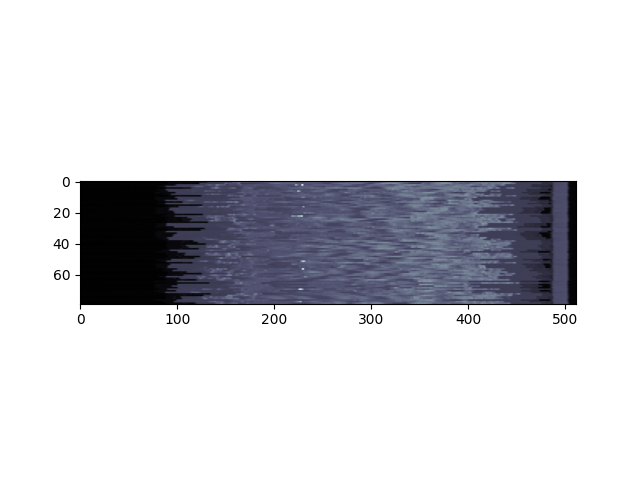

In [58]:
from IPython.display import Image

# Provide the path to the GIF file
gif_path = 'results/MIP/Animation.gif'

# Display the GIF
Image(filename=gif_path)

# Create animation

In [27]:
def median_sagittal_plane(img_dcm: np.ndarray) -> np.ndarray:
    """ Compute the median sagittal plane of the CT image provided. """
    # image_position_patient = dcm_dataset[img_dcm.shape[1]//2].ImagePositionPatient
    # print("heeh: ", img_dcm.shape[1]//2)
    print(img_dcm.shape[1]//2)
    return img_dcm[:, img_dcm.shape[1]//2, :]    # Why //2?

def median_coronal_plane(img_dcm: np.ndarray) -> np.ndarray:
    """ Compute the median sagittal plane of the CT image provided. """
    return img_dcm[:, img_dcm.shape[2]//2, :]


def MIP_sagittal_plane(img_dcm: np.ndarray) -> np.ndarray:
    """ Compute the maximum intensity projection on the sagittal orientation. """
    return np.max(img_dcm, axis=2)


def AIP_sagittal_plane(img_dcm: np.ndarray) -> np.ndarray:
    """ Compute the average intensity projection on the sagittal orientation. """
    return np.mean(img_dcm, axis=2)


def MIP_coronal_plane(img_dcm: np.ndarray) -> np.ndarray:
    """ Compute the maximum intensity projection on the coronal orientation. """
    return np.max(img_dcm, axis=1)


def AIP_coronal_plane(img_dcm: np.ndarray) -> np.ndarray:
    """ Compute the average intensity projection on the coronal orientation. """
    return np.mean(img_dcm, axis=1)


def rotate_on_axial_plane(img_dcm: np.ndarray, angle_in_degrees: float) -> np.ndarray:
    """ Rotate the image on the axial plane. """
    return scipy.ndimage.rotate(img_dcm, angle_in_degrees, axes=(1, 2), reshape=False)

In [28]:
def median_sagittal_plane_bgr(img_dcm: np.ndarray) -> np.ndarray:
    """ Compute the median sagittal plane of the BGR image provided. """
    return np.median(img_dcm[:, img_dcm.shape[1]//2, :], axis=0)

In [29]:
median_sagittal_plane_bgr(marked_seg)

array([128., 128., 128.])

How do you know the pixel_len_mm???

In [30]:
print(ct_images[0].dtype)
print(marked_seg[0].dtype)

int16_seg = [img.astype(np.int16) for img in marked_seg]
print(int16_seg[0].dtype)

int16
uint8
int16


In [39]:
# dcm = pydicom.dcmread('1-1.dcm')     # Load DICOM file
# print(dcm)                          # Print DICOM headers
pixel_len_mm = [1, 0.625, 0.625]   # Pixel length in mm [z, y, x]
img_dcm = ct_images         # Get pixel array
img_dcm = np.flip(img_dcm, axis=0)  # Change orientation (better visualization)
img_dcm = marked_seg
img_dcm = ct_images         # Get pixel array

# img_dcm = np.flip(marked_seg, axis=0)
# print(seg_flip.shape)

!Need to flip to be able to show!!!!!!! problem is diff shapes (and int16) and brg vs ct_images)

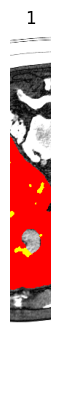

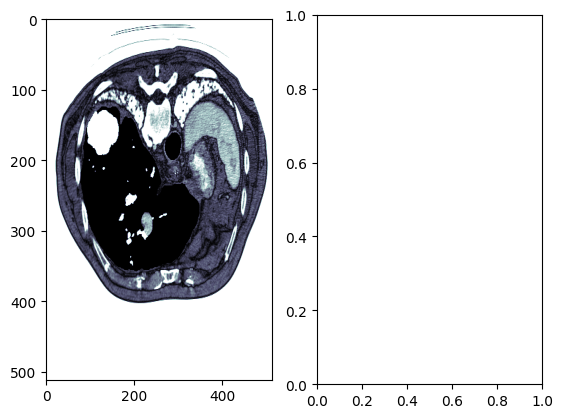

(512, 512, 3)


In [ ]:
# ct_images[:, 256, :]
plt.title('1')
plt.axis('off')
plt.imshow(seg_flip[:, 200:256, :])
fig, ax = plt.subplots(1, 2)

ax[0].imshow(seg_flip[:, :, 1], cmap=matplotlib.colormaps['bone'], aspect=pixel_len_mm[0]/pixel_len_mm[1])
plt.show()
print(marked_seg.shape)

256


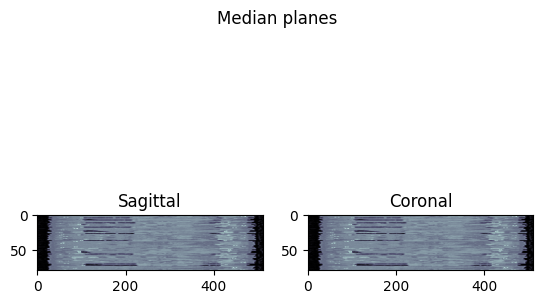

In [ ]:
# Show median planes
fig, ax = plt.subplots(1, 2)
ax[0].imshow(median_sagittal_plane(img_dcm), cmap=matplotlib.colormaps['bone'], aspect=pixel_len_mm[0]/pixel_len_mm[1])
ax[0].set_title('Sagittal')
ax[1].imshow(median_coronal_plane(img_dcm), cmap=matplotlib.colormaps['bone'], aspect=pixel_len_mm[0]/pixel_len_mm[2])
ax[1].set_title('Coronal')
fig.suptitle('Median planes')
plt.show()

In [ ]:
image_position_patient = relevent_ct_dcm_files[ct_images[0].shape[1]//2].ImagePositionPatient

IndexError: ignored

In [ ]:
# Show MIP/AIP/Median planes
fig, ax = plt.subplots(1, 3)
ax[0].imshow(median_sagittal_plane(img_dcm), cmap=matplotlib.colormaps['bone'], aspect=pixel_len_mm[0]/pixel_len_mm[1])
ax[0].set_title('Median')
ax[1].imshow(MIP_sagittal_plane(img_dcm), cmap=matplotlib.colormaps['bone'], aspect=pixel_len_mm[0]/pixel_len_mm[1])
ax[1].set_title('MIP')
ax[2].imshow(AIP_sagittal_plane(img_dcm), cmap=matplotlib.colormaps['bone'], aspect=pixel_len_mm[0]/pixel_len_mm[1])
ax[2].set_title('AIP')
fig.suptitle('Sagittal')
plt.show()

In [ ]:
fig, ax = plt.subplots(1, 3)
ax[0].imshow(median_coronal_plane(img_dcm), cmap=matplotlib.colormaps['bone'], aspect=pixel_len_mm[0]/pixel_len_mm[1])
ax[0].set_title('Median')
ax[1].imshow(MIP_coronal_plane(img_dcm), cmap=matplotlib.colormaps['bone'], aspect=pixel_len_mm[0]/pixel_len_mm[1])
ax[1].set_title('MIP')
ax[2].imshow(AIP_coronal_plane(img_dcm), cmap=matplotlib.colormaps['bone'], aspect=pixel_len_mm[0]/pixel_len_mm[1])
ax[2].set_title('AIP')
fig.suptitle('Coronal')
plt.show()

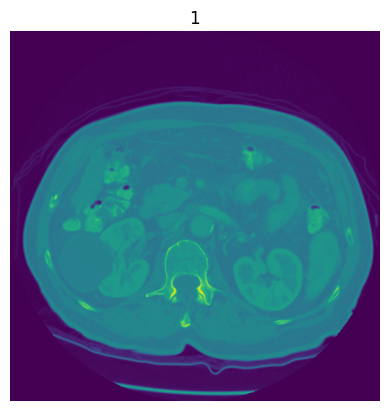

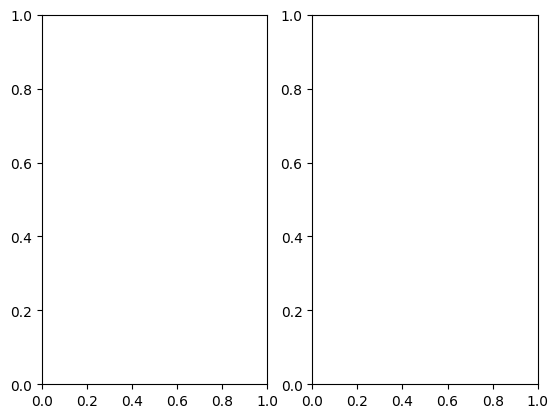

In [47]:
# ct_images[:, 256, :]
plt.title('1')
plt.axis('off')
plt.imshow(ct_images[10])
fig, ax = plt.subplots(1, 2)
plt.show()


ValueError: ignored

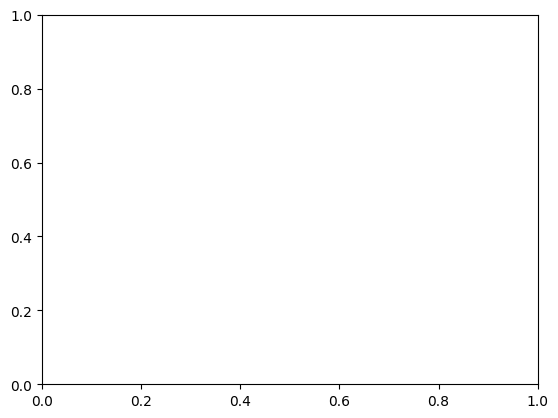

In [46]:
img_dcm = ct_images[10]
# Create projections varying the angle of rotation
#   Configure visualization colormap
img_min = np.amin(img_dcm)
img_max = np.amax(img_dcm)
cm = matplotlib.colormaps['bone']
fig, ax = plt.subplots()
#   Configure directory to save results
os.makedirs('results/MIP/', exist_ok=True)
#   Create projections
n = 6
projections = []
for idx, alpha in enumerate(np.linspace(0, 360*(n-1)/n, num=n)):
    rotated_img = rotate_on_axial_plane(img_dcm, alpha)
    projection = MIP_sagittal_plane(rotated_img)

    plt.imshow(projection, cmap=cm, vmin=img_min, vmax=img_max, aspect=pixel_len_mm[0] / pixel_len_mm[1])
    plt.savefig(f'results/MIP/Projection_{idx}.png')      # Save animation
    projections.append(projection)  # Save for later animation
# Save and visualize animation
animation_data = [
    [plt.imshow(img, animated=True, cmap=cm, vmin=img_min, vmax=img_max, aspect=pixel_len_mm[0] / pixel_len_mm[1])]
    for img in projections
]
anim = animation.ArtistAnimation(fig, animation_data,
                          interval=250, blit=True)
anim.save('results/MIP/Animation.gif')  # Save animation
plt.show() 

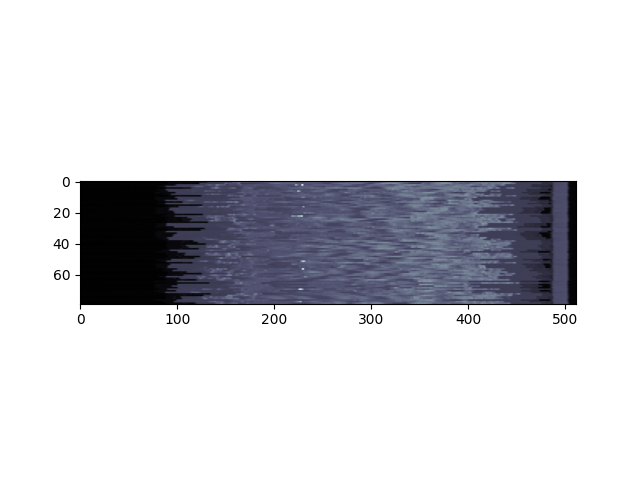

In [44]:
from IPython.display import Image

# Provide the path to the GIF file
gif_path = 'results/MIP/Animation.gif'

# Display the GIF
Image(filename=gif_path)

# Manually select landmarks

In [ ]:
unzip_file('drive-download-20230522T170643Z-001.zip', 'output')

In [ ]:
def resize_to_same(input_images, ref_images):
  desired_size = (256, 256)  # Adjust as per your requirements

  # Resize the reference images
  resized_ref_images = []
  for ref_image in ref_images:
      resized_image = cv2.resize(ref_image, desired_size)
      resized_ref_images.append(resized_image)

  # Resize the input images
  resized_input_images = []
  for input_image in input_images:
      resized_image = cv2.resize(input_image, desired_size)
      resized_input_images.append(resized_image)

  return resized_input_images, resized_ref_images

In [ ]:
from PIL import Image
def calculate_average_image(images):
    image_arrays = []
    for img in images:
        img_array = np.array(img)
        image_arrays.append(img_array)

    # Calculate the average image
    average_img_array = np.mean(image_arrays, axis=0)

    # Convert the average image array back to a PIL image
    average_img = Image.fromarray(np.uint8(average_img_array))

    return average_img

In [ ]:
input_dcm = load_dcm_files_from_folder('output/RM_Brain_3D-SPGR')
input_images = []
for ct_file in input_dcm:
    input_images.append(ct_file.pixel_array)

reference_dcm = pydicom.dcmread('icbm_avg_152_t1_tal_nlin_symmetric_VI.dcm')
ref_images = reference_dcm.pixel_array
input_images, ref_images = resize_to_same(input_images, ref_images)

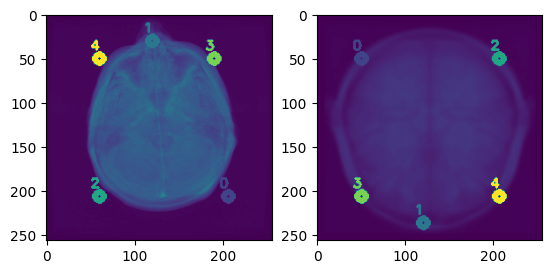

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import cv2

# Assuming debug_img1 and debug_img2 are already defined
avg_input = calculate_average_image(input_images)
avg_ref = calculate_average_image(ref_images)

debug_img1 = np.array(avg_input.copy())
debug_img2 = np.array(avg_ref.copy())

srcPts = [(206, 206), (120, 30), (60, 206), (190, 50), (60, 50)]
dstPts = [(50, 50), (120, 236), (206, 50), (50, 206), (206, 206)]

circle_radius = 5  # Adjust the radius value to control the circle size
for i, (srcPt, dstPt) in enumerate(zip(srcPts, dstPts)):
    shade = int(255 * (i + 1) / len(srcPts))  # Calculate the shade value based on the index

    # Draw circle on debug_img1
    cv2.circle(debug_img1, (int(srcPt[0]), int(srcPt[1])), circle_radius, (shade, shade, shade), 5)
    # Add label to the circle
    cv2.putText(debug_img1, str(i), (int(srcPt[0]) - 10, int(srcPt[1]) - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (shade, shade, shade), 2)

    # Draw circle on debug_img2
    cv2.circle(debug_img2, (int(dstPt[0]), int(dstPt[1])), circle_radius, (shade, shade, shade), 5)
    # Add label to the circle
    cv2.putText(debug_img2, str(i), (int(dstPt[0]) - 10, int(dstPt[1]) - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (shade, shade, shade), 2)

plt.subplot(1, 2, 1)
plt.imshow(debug_img1)

plt.subplot(1, 2, 2)
plt.imshow(debug_img2)

plt.show()

# Co-register

In [ ]:
def calculate_transform(kp1, kp2):
    kp1 = np.array(kp1)
    kp2 = np.array(kp2)
    upper = np.concatenate((kp1, np.ones((kp1.shape[0], 1)), np.zeros((kp1.shape[0], 3))), axis=1)
    lower = np.concatenate((np.zeros((kp1.shape[0], 3)), kp1, np.ones((kp1.shape[0], 1))), axis=1)
    X = np.concatenate((upper, lower), axis=0)
    Y = np.concatenate((kp2[:, 0], kp2[:, 1]))
    Y = np.expand_dims(Y, axis=-1)
    T = np.dot(np.dot(np.linalg.inv(np.dot(X.T, X)), X.T), Y)
    T = T.reshape(2, 3)
    T = np.concatenate((T, np.array([0, 0, 1]).reshape(1, 3)), axis=0)
    kp2_pred = np.dot(T, np.concatenate((kp1, np.ones((kp1.shape[0], 1))), axis=1).T).T
    kp2_pred /= kp2_pred[:, -1:]
    error = np.linalg.norm(kp2_pred[:, :2] - kp2)
    # print("coordinate reconstruction error: ", error)
    return T

In [ ]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
from scipy.optimize import minimize
from scipy.optimize import fmin

def coregister(input_image, reference_image, input_landmarks, reference_landmarks):
    avg_input_arr = np.array(input_image.copy())
    avg_ref_arr = np.array(reference_image.copy())

    height, width = np.array(avg_input_arr).shape
    mat = calculate_transform(input_landmarks, reference_landmarks)
    transformed_img = cv2.warpPerspective(input_image,
                        mat, (width, height))

    return transformed_img

In [ ]:
def coregister_batch(input_images, reference_images, input_landmarks_list, reference_landmarks_list):
    transformed_images = []

    # Iterate over the input and reference image lists
    for input_image, reference_image in zip(input_images, reference_images):
        # Apply coregistration to the current pair of images and landmarks
        transformed_image = coregister(input_image, reference_image, input_landmarks_list, reference_landmarks_list)
        transformed_images.append(transformed_image)
    return transformed_images

In [ ]:
len(ref_images)

193

In [ ]:
coregistered_images = coregister_batch(input_images, ref_images, srcPts, dstPts)

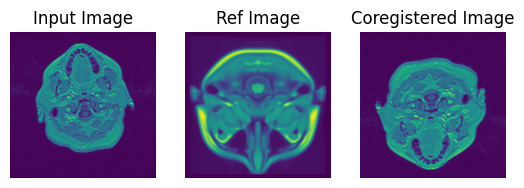

In [ ]:
no_slice = 10
input = input_images[no_slice]
ref = ref_images[no_slice]
coregistered = coregistered_images[no_slice]

transformed_img = coregister(input, ref, srcPts, dstPts)

plt.subplot(1, 3, 1)
plt.title('Input Image')
plt.axis('off')
plt.imshow(input)

plt.subplot(1, 3, 2)
plt.title('Ref Image')
plt.axis('off')
plt.imshow(ref)

plt.subplot(1, 3, 3)
plt.title('Coregistered Image')
plt.axis('off')
plt.imshow(transformed_img)

# Data Exploration

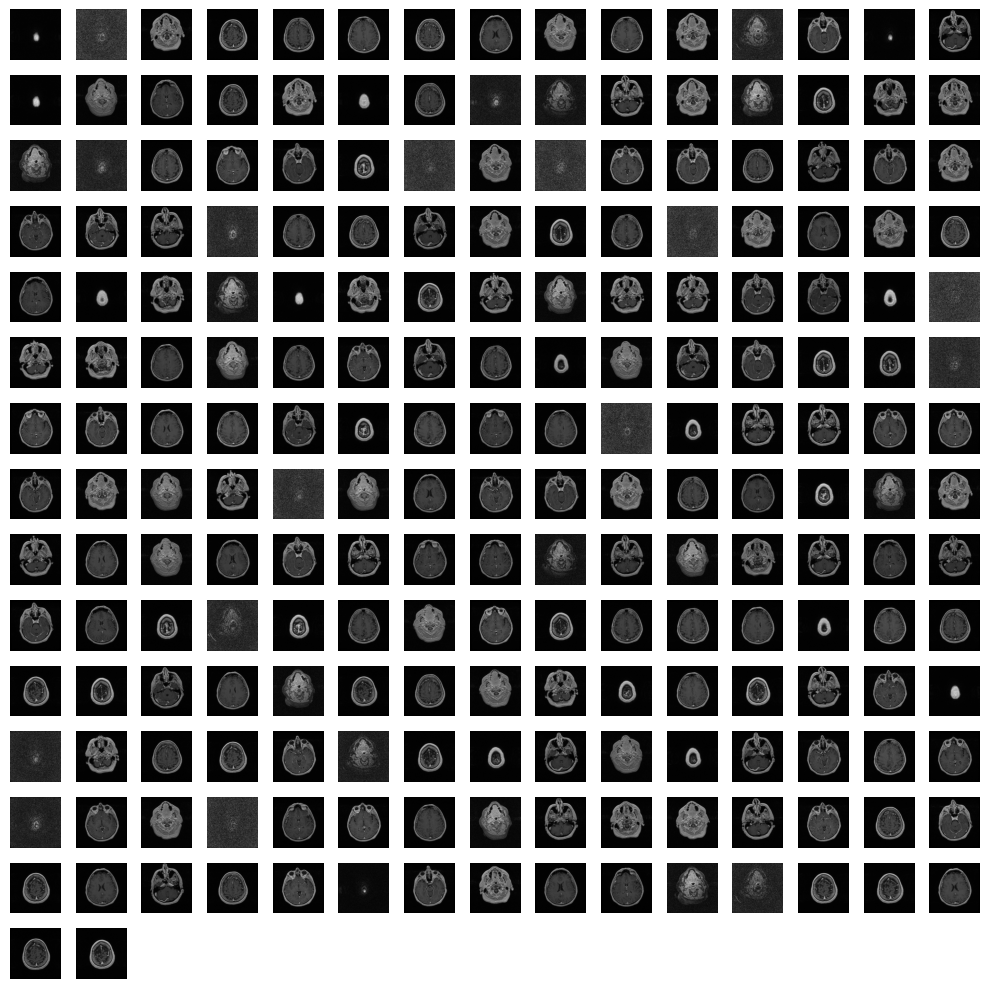

In [ ]:
import matplotlib.pyplot as plt
import math

# Define the size of the grid
grid_size = math.ceil(math.sqrt(len(input_images)))  # Adjust the grid size as needed

# Create a subplot grid
fig, axs = plt.subplots(grid_size, grid_size, figsize=(10, 10))

# Iterate over the input images and plot them in the grid
for i, image in enumerate(input_images[:grid_size * grid_size]):
    # Calculate the position in the grid
    row = i // grid_size
    col = i % grid_size

    # Plot the image in the corresponding grid cell
    axs[row, col].imshow(image, cmap='gray')
    axs[row, col].axis('off')

# Hide empty subplots if any
for i in range(len(input_images), grid_size * grid_size):
    row = i // grid_size
    col = i % grid_size
    axs[row, col].axis('off')

# Adjust the spacing and layout of subplots
plt.tight_layout()

# Display the grid of small image windows
plt.show()

# Detect Thamalas Region

In [ ]:
def get_thalamus_mask(img):
    result = np.zeros_like(img)
    result[(121 <= img) & (img <= 150)] = 1
    return result

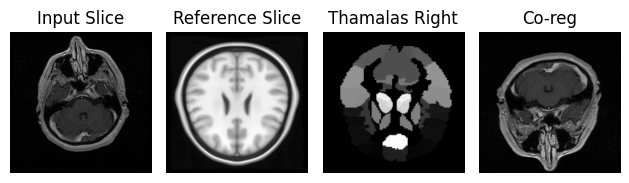

In [ ]:
input_dcm = load_dcm_files_from_folder('output/RM_Brain_3D-SPGR')
input_images = []
for input_file in input_dcm:
    input_images.append(input_file.pixel_array)

reference_dcm = pydicom.dcmread('icbm_avg_152_t1_tal_nlin_symmetric_VI.dcm')
ref_images = reference_dcm.pixel_array
input_images, ref_images = resize_to_same(input_images, ref_images)

thamalus_dcm = pydicom.dcmread('output/AAL3_1mm.dcm')
thamalus_images = thamalus_dcm.pixel_array
coregistered_images, thamalus_images = resize_to_same(coregistered_images, thamalus_images)

thamalus_image = thamalus_images[82]
# Select a specific slice from the pixel data
ref_slice_index = 100  # Adjust this value to the desired slice index

# Create a figure with two subplots
fig, axs = plt.subplots(1, 4)

# Display the input slice in the first subplot
axs[0].imshow(input_images[ref_slice_index], cmap=plt.cm.gray)
axs[0].axis('off')  # Hide the axis ticks
axs[0].set_title('Input Slice')

# Display the reference slice in the second subplot
axs[1].imshow(ref_images[ref_slice_index], cmap=plt.cm.gray)
axs[1].axis('off')  # Hide the axis ticks
axs[1].set_title('Reference Slice')


# Display the reference slice in the second subplot
axs[2].imshow(thamalus_image, cmap=plt.cm.gray)
axs[2].axis('off')  # Hide the axis ticks
axs[2].set_title('Thamalas Right')

# Display the reference slice in the second subplot
axs[3].imshow(coregistered_images[ref_slice_index], cmap=plt.cm.gray)
axs[3].axis('off')  # Hide the axis ticks
axs[3].set_title('Co-reg')

# Adjust the spacing between subplots
fig.tight_layout()

# Show the figure
plt.show()

In [ ]:
def mark_thamalas(input, thamalus_image):
# input = coregistered_images[100]

  if input.dtype == np.int16:
      # Convert the image to a supported depth (e.g., CV_8U)
      input = cv2.convertScaleAbs(input)

  thamalus_image = cv2.resize(thamalus_image, (input.shape[1], input.shape[0]))

  # print(thamalus_image.shape)
  # print(input.shape)
  # print(input.dtype)

  _, binary_image = cv2.threshold(thamalus_image, 100, 255, cv2.THRESH_BINARY)
  nonzero_pixels = np.nonzero(binary_image)

  marked_image = cv2.cvtColor(input, cv2.COLOR_GRAY2BGR)  # Convert to BGR for color marking
  marked_image[nonzero_pixels] = [0, 0, 255] 
  return marked_image

(-0.5, 255.5, 255.5, -0.5)

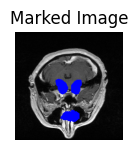

In [ ]:
marked_image = mark_thamalas(coregistered_images[100], thamalus_image)
plt.subplot(1, 4, 1)
plt.imshow(marked_image)
plt.title('Marked Image')
plt.axis('off')

In [ ]:
def highlight_thamalas_batch(coregistered_images, thamalas_image):
    thamalas_images = []

    # Iterate over the input and reference image lists
    for input_image in coregistered_images:
        # Apply coregistration to the current pair of images and landmarks
        thamalas_image_overlay = mark_thamalas(input_image, thamalas_image)
        thamalas_images.append(thamalas_image_overlay)
    return thamalas_images

In [ ]:
marked_images = highlight_thamalas_batch(coregistered_images, thamalus_image)

(-0.5, 255.5, 255.5, -0.5)

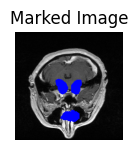

In [ ]:
plt.subplot(1, 4, 1)
plt.imshow(marked_images[100])
plt.title('Marked Image')
plt.axis('off')